# COMP3850 - FX analysis

In [307]:
#data manipulation libraries
import pandas as pd
import numpy as np 

#data visualisation libraries
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
# import matplotlib as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from pandas.plotting import autocorrelation_plot
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from matplotlib import pyplot

#stat models libraries 
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller#for augmented Dickey-Fuller test
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.tsa.api as smt #autocovariance plot

#sklearn predictive modelling
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

#technical analysis libaries
import talib as ta # Used to perform Technical analysis of financial market data

#others libraries 
import math
import datetime

#libaries to collect path for data extraction
import os
import glob

In [280]:
directory = os.getcwd()
filepath = f"{directory}\Hourly_data"
dfaudusd_hr = pd.read_csv(f"{filepath}\dfaudusd_hr.csv")
dfeuraud_hr = pd.read_csv(f"{filepath}\dfeuraud_hr.csv")
dfeurgbp_hr = pd.read_csv(f"{filepath}\dfeurgbp_hr.csv")
dfeurusd_hr = pd.read_csv(f"{filepath}\dfeurusd_hr.csv")
dfgbpusd_hr = pd.read_csv(f"{filepath}\dfgbpusd_hr.csv")
dfaudusd_hr.head()

,Unnamed: 0,datetime,bid_open,bid_high,bid_low,bid_close,bid_volume,bid_average,bid_barCount,ask_open,ask_high,ask_low,ask_close,ask_volume,ask_average,ask_barCount
0,0,2020-06-01 00:00:00+00:00,0.66582,0.66583,0.66581,0.66582,-1,-1.0,-1,0.66584,0.66586,0.66584,0.66586,-1,-1.0,-1
1,3600,2020-06-01 01:00:00+00:00,0.66897,0.66898,0.66880,0.66880,-1,-1.0,-1,0.66902,0.66902,0.66883,0.66883,-1,-1.0,-1
2,7200,2020-06-01 02:00:00+00:00,0.67251,0.67253,0.67251,0.67253,-1,-1.0,-1,0.67255,0.67255,0.67253,0.67255,-1,-1.0,-1
3,10800,2020-06-01 03:00:00+00:00,0.67355,0.67357,0.67352,0.67353,-1,-1.0,-1,0.67357,0.67358,0.67356,0.67357,-1,-1.0,-1
4,14400,2020-06-01 04:00:00+00:00,0.67192,0.67199,0.67192,0.67199,-1,-1.0,-1,0.67195,0.67200,0.67195,0.67200,-1,-1.0,-1


In [281]:
dfaudusd_hr = dfaudusd_hr.drop(dfaudusd_hr.columns[[0]], axis=1)
dfeuraud_hr = dfeuraud_hr.drop(dfeuraud_hr.columns[[0]], axis=1)
dfeurgbp_hr = dfeurgbp_hr.drop(dfeurgbp_hr.columns[[0]], axis=1)
dfeurusd_hr = dfeurusd_hr.drop(dfeurusd_hr.columns[[0]], axis=1)
dfgbpusd_hr = dfgbpusd_hr.drop(dfgbpusd_hr.columns[[0]], axis=1)
dfaudusd_hr.head()

,datetime,bid_open,bid_high,bid_low,bid_close,bid_volume,bid_average,bid_barCount,ask_open,ask_high,ask_low,ask_close,ask_volume,ask_average,ask_barCount
0,2020-06-01 00:00:00+00:00,0.66582,0.66583,0.66581,0.66582,-1,-1.0,-1,0.66584,0.66586,0.66584,0.66586,-1,-1.0,-1
1,2020-06-01 01:00:00+00:00,0.66897,0.66898,0.66880,0.66880,-1,-1.0,-1,0.66902,0.66902,0.66883,0.66883,-1,-1.0,-1
2,2020-06-01 02:00:00+00:00,0.67251,0.67253,0.67251,0.67253,-1,-1.0,-1,0.67255,0.67255,0.67253,0.67255,-1,-1.0,-1
3,2020-06-01 03:00:00+00:00,0.67355,0.67357,0.67352,0.67353,-1,-1.0,-1,0.67357,0.67358,0.67356,0.67357,-1,-1.0,-1
4,2020-06-01 04:00:00+00:00,0.67192,0.67199,0.67192,0.67199,-1,-1.0,-1,0.67195,0.67200,0.67195,0.67200,-1,-1.0,-1


In [282]:
dfs= [dfaudusd_hr, dfeuraud_hr, dfeurgbp_hr, dfeurusd_hr, dfgbpusd_hr]
for i in range(len(dfs)):
    dfs[i][['Date', 'Time']] = dfs[i]['datetime'].str.split(' ', expand=True)
    dfs[i][['Time', 'Useless']]  = dfs[i]['Time'].str.split('+', expand=True)
dfaudusd_hr.head()

,datetime,bid_open,bid_high,bid_low,bid_close,bid_volume,bid_average,bid_barCount,ask_open,ask_high,ask_low,ask_close,ask_volume,ask_average,ask_barCount,Date,Time,Useless
0,2020-06-01 00:00:00+00:00,0.66582,0.66583,0.66581,0.66582,-1,-1.0,-1,0.66584,0.66586,0.66584,0.66586,-1,-1.0,-1,2020-06-01,00:00:00,00:00
1,2020-06-01 01:00:00+00:00,0.66897,0.66898,0.66880,0.66880,-1,-1.0,-1,0.66902,0.66902,0.66883,0.66883,-1,-1.0,-1,2020-06-01,01:00:00,00:00
2,2020-06-01 02:00:00+00:00,0.67251,0.67253,0.67251,0.67253,-1,-1.0,-1,0.67255,0.67255,0.67253,0.67255,-1,-1.0,-1,2020-06-01,02:00:00,00:00
3,2020-06-01 03:00:00+00:00,0.67355,0.67357,0.67352,0.67353,-1,-1.0,-1,0.67357,0.67358,0.67356,0.67357,-1,-1.0,-1,2020-06-01,03:00:00,00:00
4,2020-06-01 04:00:00+00:00,0.67192,0.67199,0.67192,0.67199,-1,-1.0,-1,0.67195,0.67200,0.67195,0.67200,-1,-1.0,-1,2020-06-01,04:00:00,00:00


## Data Extraction

Extracting the given FX csv files and storing them within dataframes via Jupiter notebook

In [18]:
def data_extraction(curr):
    directory = os.getcwd()
    filepath = f"{directory}\FX"
    file_list = []
    for file in os.listdir(filepath):
        d = os.path.join(filepath, file)
        if os.path.isdir(d):
            file_list.append(d)
    dfs = []
    for d in file_list:
        csv_files = glob.glob(os.path.join(d, "*.csv"))
        for f in csv_files:
            if f"bar_Forex_{curr}" in f:
                df = pd.read_csv(f)
                dfs.append(df)
    final_df = pd.concat(dfs)
    return final_df

In [20]:
dfaudusd = data_extraction('AUDUSD')
dfeuraud = data_extraction('EURAUD')
dfeurgbp = data_extraction('EURGBP')
dfeurusd = data_extraction('EURUSD')
dfgbpusd = data_extraction('GBPUSD')

In [21]:
dfaudusd.head()

,date,bid_open,bid_high,bid_low,bid_close,bid_volume,bid_average,bid_barCount,ask_open,ask_high,ask_low,ask_close,ask_volume,ask_average,ask_barCount
0,2020-06-01 00:00:00+00:00,0.66582,0.66583,0.66581,0.66582,-1,-1.0,-1,0.66584,0.66586,0.66584,0.66586,-1,-1.0,-1
1,2020-06-01 00:00:01+00:00,0.66582,0.66582,0.66581,0.66581,-1,-1.0,-1,0.66586,0.66586,0.66584,0.66584,-1,-1.0,-1
2,2020-06-01 00:00:02+00:00,0.66581,0.66582,0.66581,0.66581,-1,-1.0,-1,0.66584,0.66586,0.66584,0.66586,-1,-1.0,-1
3,2020-06-01 00:00:03+00:00,0.66581,0.66582,0.66581,0.66582,-1,-1.0,-1,0.66586,0.66586,0.66586,0.66586,-1,-1.0,-1
4,2020-06-01 00:00:04+00:00,0.66582,0.66582,0.66582,0.66582,-1,-1.0,-1,0.66586,0.66586,0.66586,0.66586,-1,-1.0,-1


In [5]:
dfaudusd.shape

(9187200, 15)

In [6]:
dfaudusd.head()

,date,bid_open,bid_high,bid_low,bid_close,bid_volume,bid_average,bid_barCount,ask_open,ask_high,ask_low,ask_close,ask_volume,ask_average,ask_barCount
0,2020-06-01 00:00:00+00:00,0.66582,0.66583,0.66581,0.66582,-1,-1.0,-1,0.66584,0.66586,0.66584,0.66586,-1,-1.0,-1
1,2020-06-01 00:00:01+00:00,0.66582,0.66582,0.66581,0.66581,-1,-1.0,-1,0.66586,0.66586,0.66584,0.66584,-1,-1.0,-1
2,2020-06-01 00:00:02+00:00,0.66581,0.66582,0.66581,0.66581,-1,-1.0,-1,0.66584,0.66586,0.66584,0.66586,-1,-1.0,-1
3,2020-06-01 00:00:03+00:00,0.66581,0.66582,0.66581,0.66582,-1,-1.0,-1,0.66586,0.66586,0.66586,0.66586,-1,-1.0,-1
4,2020-06-01 00:00:04+00:00,0.66582,0.66582,0.66582,0.66582,-1,-1.0,-1,0.66586,0.66586,0.66586,0.66586,-1,-1.0,-1


In [7]:
dfaudusd.shape

(9187200, 15)

## Data Preparation

In [8]:
## change the name of 'date' field to datatime

In [9]:
#Determining the size of each dataframe (number of records, number of columns)
print(dfaudusd.shape, dfeuraud.shape, dfeurgbp.shape, dfeurusd.shape, dfgbpusd.shape)

(9187200, 15) (9187200, 15) (9187200, 15) (9187200, 15) (9187200, 15)


In [10]:
#display the datatypes of each column
dfaudusd.info()
# dfeuraud.info()
# dfeurgbp.info()
# dfeurusd.info()
# dfgbpusd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9187200 entries, 0 to 75599
Data columns (total 15 columns):
 #   Column        Dtype  
---  ------        -----  
 0   date          object 
 1   bid_open      float64
 2   bid_high      float64
 3   bid_low       float64
 4   bid_close     float64
 5   bid_volume    int64  
 6   bid_average   float64
 7   bid_barCount  int64  
 8   ask_open      float64
 9   ask_high      float64
 10  ask_low       float64
 11  ask_close     float64
 12  ask_volume    int64  
 13  ask_average   float64
 14  ask_barCount  int64  
dtypes: float64(10), int64(4), object(1)
memory usage: 1.1+ GB


In [11]:
#display descriptive statistics on AUD-USD pairings
dfaudusd.describe().round(3)

,bid_open,bid_high,bid_low,bid_close,bid_volume,bid_average,bid_barCount,ask_open,ask_high,ask_low,ask_close,ask_volume,ask_average,ask_barCount
count,9187200.000,9187200.000,9187200.000,9187200.000,9187200.0,9187200.0,9187200.0,9187200.000,9187200.000,9187200.000,9187200.000,9187200.0,9187200.0,9187200.0
mean,0.710,0.710,0.710,0.710,-1.0,-1.0,-1.0,0.710,0.710,0.710,0.710,-1.0,-1.0,-1.0
std,0.014,0.014,0.014,0.014,0.0,0.0,0.0,0.014,0.014,0.014,0.014,0.0,0.0,0.0
min,0.666,0.666,0.666,0.666,-1.0,-1.0,-1.0,0.666,0.666,0.666,0.666,-1.0,-1.0,-1.0
25%,0.697,0.697,0.697,0.697,-1.0,-1.0,-1.0,0.697,0.697,0.697,0.697,-1.0,-1.0,-1.0
50%,0.713,0.713,0.713,0.713,-1.0,-1.0,-1.0,0.713,0.713,0.713,0.713,-1.0,-1.0,-1.0
75%,0.719,0.719,0.719,0.719,-1.0,-1.0,-1.0,0.719,0.719,0.719,0.719,-1.0,-1.0,-1.0
max,0.741,0.741,0.741,0.741,-1.0,-1.0,-1.0,0.741,0.741,0.741,0.741,-1.0,-1.0,-1.0


In [12]:
dfeuraud.describe().round(3)

,bid_open,bid_high,bid_low,bid_close,bid_volume,bid_average,bid_barCount,ask_open,ask_high,ask_low,ask_close,ask_volume,ask_average,ask_barCount
count,9187200.000,9187200.000,9187200.000,9187200.000,9187200.0,9187200.0,9187200.0,9187200.000,9187200.000,9187200.000,9187200.000,9187200.0,9187200.0,9187200.0
mean,1.638,1.638,1.638,1.638,-1.0,-1.0,-1.0,1.638,1.638,1.638,1.638,-1.0,-1.0,-1.0
std,0.013,0.013,0.013,0.013,0.0,0.0,0.0,0.013,0.013,0.013,0.013,0.0,0.0,0.0
min,1.603,1.603,1.603,1.603,-1.0,-1.0,-1.0,1.603,1.603,1.603,1.603,-1.0,-1.0,-1.0
25%,1.627,1.627,1.627,1.627,-1.0,-1.0,-1.0,1.627,1.627,1.627,1.627,-1.0,-1.0,-1.0
50%,1.636,1.637,1.636,1.636,-1.0,-1.0,-1.0,1.637,1.637,1.637,1.637,-1.0,-1.0,-1.0
75%,1.647,1.647,1.647,1.647,-1.0,-1.0,-1.0,1.648,1.648,1.648,1.648,-1.0,-1.0,-1.0
max,1.683,1.683,1.683,1.683,-1.0,-1.0,-1.0,1.683,1.683,1.683,1.683,-1.0,-1.0,-1.0


In [13]:
#checking for nulls and the sum
print(f'Are there any null values in AUDUSD? {dfaudusd.isnull().values.any()}')
# print(f'Which fields have null values:\n{dfaudusd.isnull().sum()}')
print(f'Are there any null values in EUROAUD? {dfeuraud.isnull().values.any()}')
# print(f'Which fields have null values:\n{dfeuraud.isnull().sum()}')
print(f'Are there any null values in EUROGBP? {dfeurgbp.isnull().values.any()}')
# print(f'Which fields have null values:\n{dfeurgbp.isnull().sum()}')
print(f'Are there any null values EURUSD? {dfeurusd.isnull().values.any()}')
# print(f'Which fields have null values:\n{dfeurusd.isnull().sum()}')
print(f'Are there any null values GBPUSD? {dfgbpusd.isnull().values.any()}')
# print(f'Which fields have null values:\n{dfgbpusd.isnull().sum()}')

Are there any null values in AUDUSD? False
Are there any null values in EUROAUD? False
Are there any null values in EUROGBP? False
Are there any null values EURUSD? False
Are there any null values GBPUSD? False


### Extracting particular times of the day

In [22]:
dfs= [dfaudusd, dfeuraud, dfeurgbp, dfeurusd, dfgbpusd]
for i in range(len(dfs)):
    dfs[i][['Date', 'Time']] = dfs[i]['date'].str.split(' ', expand=True)
    dfs[i][['Time', 'Useless']]  = dfs[i]['Time'].str.split('+', expand=True)
dfaudusd.head()



,date,bid_open,bid_high,bid_low,bid_close,bid_volume,bid_average,bid_barCount,ask_open,ask_high,ask_low,ask_close,ask_volume,ask_average,ask_barCount,Date,Time,Useless
0,2020-06-01 00:00:00+00:00,0.66582,0.66583,0.66581,0.66582,-1,-1.0,-1,0.66584,0.66586,0.66584,0.66586,-1,-1.0,-1,2020-06-01,00:00:00,00:00
1,2020-06-01 00:00:01+00:00,0.66582,0.66582,0.66581,0.66581,-1,-1.0,-1,0.66586,0.66586,0.66584,0.66584,-1,-1.0,-1,2020-06-01,00:00:01,00:00
2,2020-06-01 00:00:02+00:00,0.66581,0.66582,0.66581,0.66581,-1,-1.0,-1,0.66584,0.66586,0.66584,0.66586,-1,-1.0,-1,2020-06-01,00:00:02,00:00
3,2020-06-01 00:00:03+00:00,0.66581,0.66582,0.66581,0.66582,-1,-1.0,-1,0.66586,0.66586,0.66586,0.66586,-1,-1.0,-1,2020-06-01,00:00:03,00:00
4,2020-06-01 00:00:04+00:00,0.66582,0.66582,0.66582,0.66582,-1,-1.0,-1,0.66586,0.66586,0.66586,0.66586,-1,-1.0,-1,2020-06-01,00:00:04,00:00


In [23]:
#chaning the name from date to datetime which is a better field name
for i in range(len(dfs)):
    dfs[i].rename(columns = {'date' : 'datetime'}, inplace=True)

In [15]:
#don't execute if you have executed the above cell
# dfaudusd[['Date', 'Time']] = dfaudusd['date'].str.split(' ', expand=True)
# dfaudusd[['Time', 'Useless']]  = dfaudusd['Time'].str.split('+', expand=True)
# dfaudusd.head()

In [16]:
#check updated datatypes
dfaudusd.dtypes
#dfeuraud.dtypes
#dfeurgbp.dtypes
#dfeurusd.dtypes
#dfgbpusd.dtypes

date             object
bid_open        float64
bid_high        float64
bid_low         float64
bid_close       float64
bid_volume        int64
bid_average     float64
bid_barCount      int64
ask_open        float64
ask_high        float64
ask_low         float64
ask_close       float64
ask_volume        int64
ask_average     float64
ask_barCount      int64
Date             object
Time             object
Useless          object
dtype: object

### Placing the extraction of hourly data here
Grabbing each hour of the given datasets for each FX pairings. This means we will have 24 records for each day

In [25]:
#This function is created to make it easier to get the hourly intervals for each fx pairings
#0 to 23 for each day
def hourly_intervals(curr_df):
    hr_list = []
    for i in range(0,24):
        hr_list.append(curr_df[(curr_df['Time'].str.contains(f'{i}:00:00'))])
    df = pd.concat(hr_list)
    #sorting by the datetime and dropping all duplicates (if any)
    return df.sort_values(by=['datetime'], ascending=True).drop_duplicates()


In [26]:
dfaudusd_hr = hourly_intervals(dfaudusd)

In [27]:
#applying the functuon to the remaining dataframes
dfeuraud_hr = hourly_intervals(dfeuraud)
dfeurgbp_hr = hourly_intervals(dfeurgbp)
dfeurusd_hr = hourly_intervals(dfeurusd)
dfgbpusd_hr = hourly_intervals(dfgbpusd)

In [31]:
## OPTIONAL: IF wanting to skip the longer processes you can open the following csv files:
#can open at the top of the notebook
directory = os.getcwd()
dfaudusd_hr.iloc[:,0:15].to_csv(f"{directory}\Hourly_data\dfaudusd_hr.csv")
dfeuraud_hr.iloc[:,0:15].to_csv(f"{directory}\Hourly_data\dfeuraud_hr.csv")
dfeurgbp_hr.iloc[:,0:15].to_csv(f"{directory}\Hourly_data\dfeurgbp_hr.csv")
dfeurusd_hr.iloc[:,0:15].to_csv(f"{directory}\Hourly_data\dfeurusd_hr.csv")
dfgbpusd_hr.iloc[:,0:15].to_csv(f"{directory}\Hourly_data\dfgbpusd_hr.csv")


### Producing the time series trend

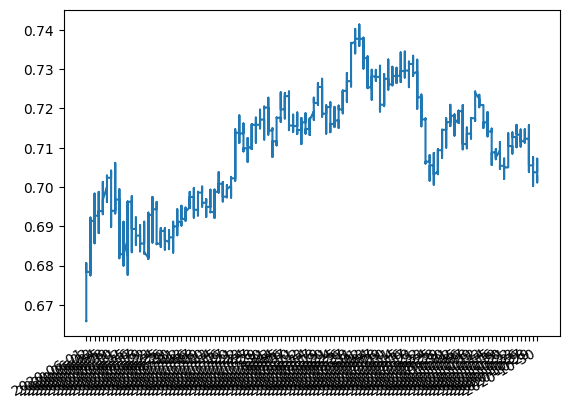

In [21]:
fig, ax = plt.subplots()
ax.plot(dfaudusd['Date'], dfaudusd['bid_open'])
fig.autofmt_xdate()


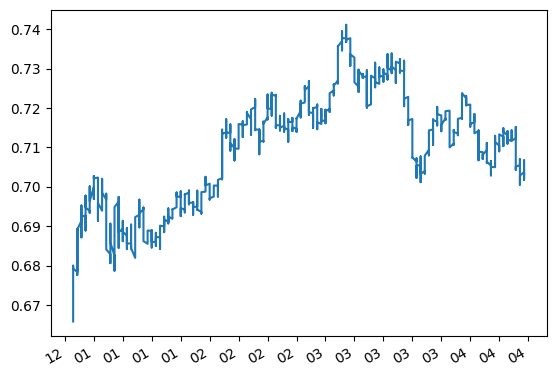

In [12]:
from matplotlib.dates import DateFormatter


fig, ax = plt.subplots()
ax.plot(dfaudusd_hr['Date'], dfaudusd_hr['bid_open'])
fig.autofmt_xdate()
#ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')
date_form = DateFormatter("%m")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
#ax.set_title('Bid Open for AU/USD')

In [23]:
#example
df_open['date'] = pd.to_datetime(df_open['date'])
df_open = df_open.set_index(pd.DatetimeIndex(df_open['date']))

NameError: name 'df_open' is not defined

In [ ]:
# Placing the plots in the plane
plot1 = plt.subplot2grid((3, 2), (0, 0), colspan=1)
plot2 = plt.subplot2grid((3, 2), (1, 0), rowspan=1, colspan=1)
plot3 = plt.subplot2grid((3, 2), (0, 1), rowspan=1)
plot4 = plt.subplot2grid((3, 2), (1, 1), rowspan=1)
plot5 = plt.subplot2grid((3, 2), (2, 1), rowspan=1)

# Plot for EUR/AUD
plot2.plot(dfeuraud_hr['Date'], dfeuraud_hr['bid_close'])
plot2.set_xticks([])
plot2.set_xlabel('Date')
plot2.set_ylabel('Price')
plot2.set_title('EUR/AUD')

# Plot for EUR/GBP
plot1.plot(dfeurgbp_hr['Date'], dfeurgbp_hr['bid_close'])
plot1.set_xticks([])
plot1.set_xlabel('Date')
plot1.set_ylabel('Price')
plot1.set_title('EUR/GBP')

# Plot for EUR/USD
plot3.plot(dfeurusd_hr['Date'], dfeurusd_hr['bid_close'])
plot3.set_xticks([])
plot3.set_xlabel('Date')
plot3.set_ylabel('Price')
plot3.set_title('EUR/USD')

# Plot for GBP/USD
plot4.plot(dfgbpusd_hr['Date'], dfgbpusd_hr['bid_close'])
plot4.set_xticks([])
plot4.set_xlabel('Date')
plot4.set_ylabel('Price')
plot4.set_title('GBP/USD')

# Plot for AUD/USD
plot5.plot(dfaudusd_hr['Date'], dfaudusd_hr['bid_close'])
plot5.set_xticks([])
plot5.set_xlabel('Date')
plot5.set_ylabel('Price')
plot5.set_title('AUD/USD')

# Packing all the plots and displaying them
plt.tight_layout()
plt.show()

## Determine if stationary

In [ ]:
x = dfaudusdse['bid_open']
y = dfaudusdse['ask_open']


In [237]:
##### CANDLESTICK CODE #####
import pandas as pd
from datetime import datetime
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=dfaudusd_hr['Date'],
                open=dfaudusd_hr['bid_open'],
                high=dfaudusd_hr['bid_high'],
                low=dfaudusd_hr['bid_low'],
                close=dfaudusd_hr['bid_close'])])

fig.show()
##### Candlestick code #####

In [238]:
import pandas as pd
from datetime import datetime
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=dfeuraud_hr['Date'],
                open=dfeuraud_hr['bid_open'],
                high=dfeuraud_hr['bid_high'],
                low=dfeuraud_hr['bid_low'],
                close=dfeuraud_hr['bid_close'])])

fig.show()

In [239]:
import pandas as pd
from datetime import datetime
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=dfeurgbp_hr['Date'],
                open=dfeurgbp_hr['bid_open'],
                high=dfeurgbp_hr['bid_high'],
                low=dfeurgbp_hr['bid_low'],
                close=dfeurgbp_hr['bid_close'])])

fig.show()

In [240]:
import pandas as pd
from datetime import datetime
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=dfeurusd_hr['Date'],
                open=dfeurusd_hr['bid_open'],
                high=dfeurusd_hr['bid_high'],
                low=dfeurusd_hr['bid_low'],
                close=dfeurusd_hr['bid_close'])])

fig.show()

In [241]:
import pandas as pd
from datetime import datetime
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=dfgbpusd_hr['Date'],
                open=dfgbpusd_hr['bid_open'],
                high=dfgbpusd_hr['bid_high'],
                low=dfgbpusd_hr['bid_low'],
                close=dfgbpusd_hr['bid_close'])])

fig.show()

In [266]:
from matplotlib.pyplot import boxplot, scatter
from numpy import histogram

x = dfaudusd_hr['bid_open']
y = dfaudusd_hr['ask_open']
histogram(x)

(array([  8,  29, 190, 331, 299, 268, 700, 315, 275,  71], dtype=int64),
 array([0.66582, 0.67335, 0.68088, 0.68841, 0.69594, 0.70347, 0.711  ,
        0.71853, 0.72606, 0.73359, 0.74112]))

<AxesSubplot: title={'center': 'GBP/USD'}>

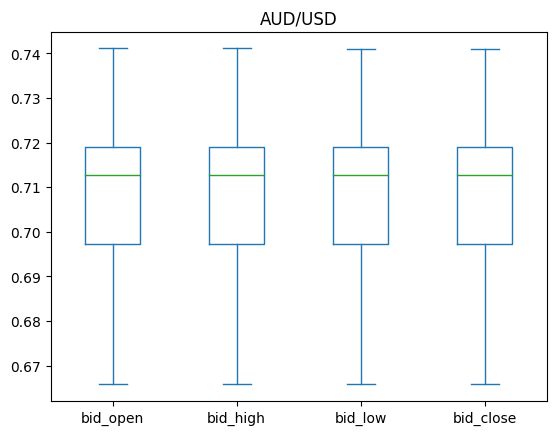

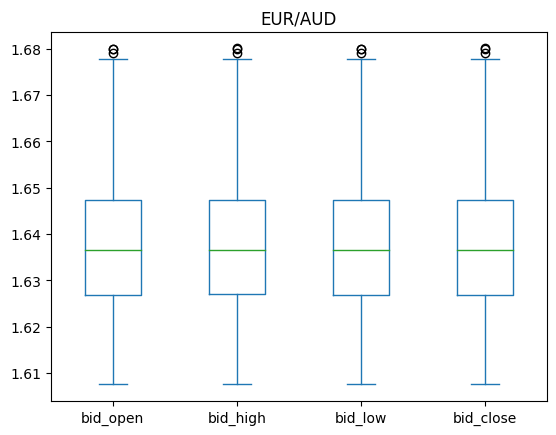

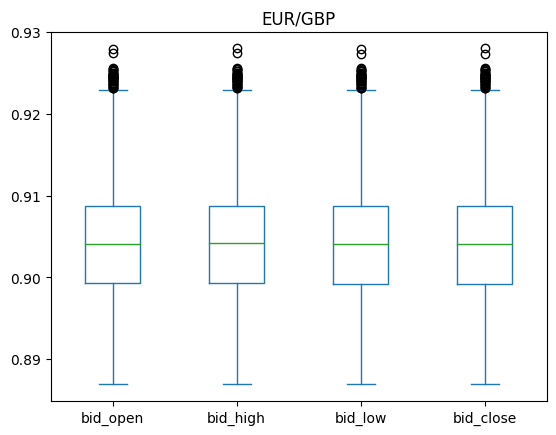

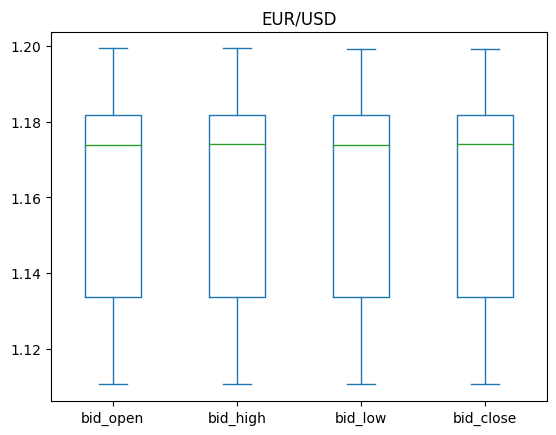

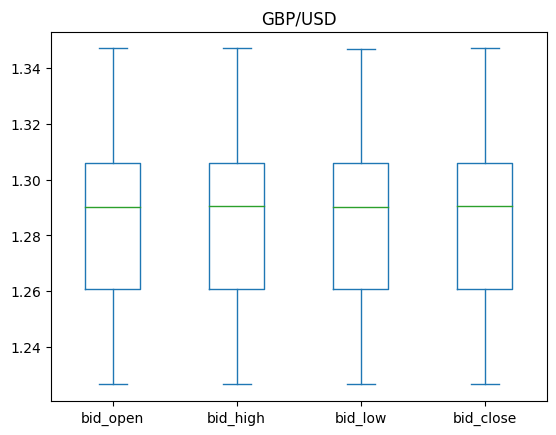

In [278]:
dfaudusd_hr[['bid_open','bid_high','bid_low','bid_close']].plot(kind='box', title = 'AUD/USD')
dfeuraud_hr[['bid_open','bid_high','bid_low','bid_close']].plot(kind='box', title = 'EUR/AUD')
dfeurgbp_hr[['bid_open','bid_high','bid_low','bid_close']].plot(kind='box', title = 'EUR/GBP')
dfeurusd_hr[['bid_open','bid_high','bid_low','bid_close']].plot(kind='box', title = 'EUR/USD')
dfgbpusd_hr[['bid_open','bid_high','bid_low','bid_close']].plot(kind='box', title = 'GBP/USD')

In [ ]:
df_open = dfaudusdse[['date', 'bid_open']]
df_open['date'] = pd.to_datetime(df_open['date'])
df_open = df_open.set_index(pd.DatetimeIndex(df_open['date']))
del df_open['date']
df_open.head()

C:\Users\Chris\AppData\Local\Temp\ipykernel_29996\1640748666.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_open['date'] = pd.to_datetime(df_open['date'])


,bid_open
date,
2020-06-01 10:00:00+00:00,0.67288
2020-06-01 16:00:00+00:00,0.67849
2020-06-02 10:00:00+00:00,0.68663
2020-06-02 16:00:00+00:00,0.68716
2020-06-03 10:00:00+00:00,0.69044


<AxesSubplot: xlabel='Lag', ylabel='Autocorrelation'>

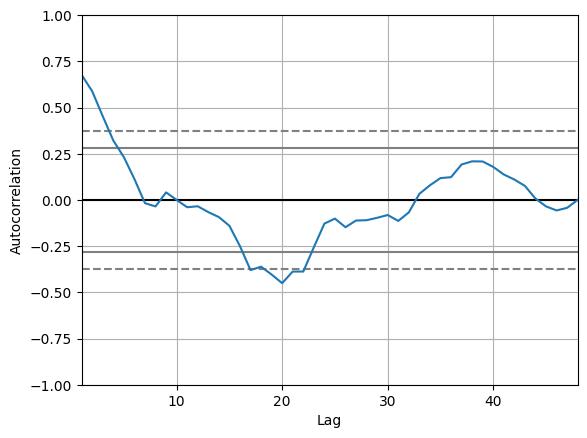

In [ ]:
autocorrelation_plot(df_open)

In [ ]:
dfeurusd_day = dfeurusd[dfeurusd['date'].str.contains('2020-06-01')]
dfeurusd_day.head()


,date,bid_open,bid_high,bid_low,bid_close,bid_volume,bid_average,bid_barCount,ask_open,ask_high,ask_low,ask_close,ask_volume,ask_average,ask_barCount,Date,Time,Useless
0,2020-06-01 00:00:00+00:00,1.11157,1.11158,1.11154,1.11154,-1,-1.0,-1,1.11158,1.11160,1.11155,1.11155,-1,-1.0,-1,2020-06-01,00:00:00,00:00
1,2020-06-01 00:00:01+00:00,1.11154,1.11157,1.11154,1.11155,-1,-1.0,-1,1.11155,1.11160,1.11155,1.11156,-1,-1.0,-1,2020-06-01,00:00:01,00:00
2,2020-06-01 00:00:02+00:00,1.11155,1.11155,1.11155,1.11155,-1,-1.0,-1,1.11156,1.11156,1.11156,1.11156,-1,-1.0,-1,2020-06-01,00:00:02,00:00
3,2020-06-01 00:00:03+00:00,1.11155,1.11155,1.11155,1.11155,-1,-1.0,-1,1.11156,1.11156,1.11156,1.11156,-1,-1.0,-1,2020-06-01,00:00:03,00:00
4,2020-06-01 00:00:04+00:00,1.11155,1.11155,1.11154,1.11155,-1,-1.0,-1,1.11156,1.11156,1.11156,1.11156,-1,-1.0,-1,2020-06-01,00:00:04,00:00


Autocovariance and Autocorrelation plots 

To check stationarity

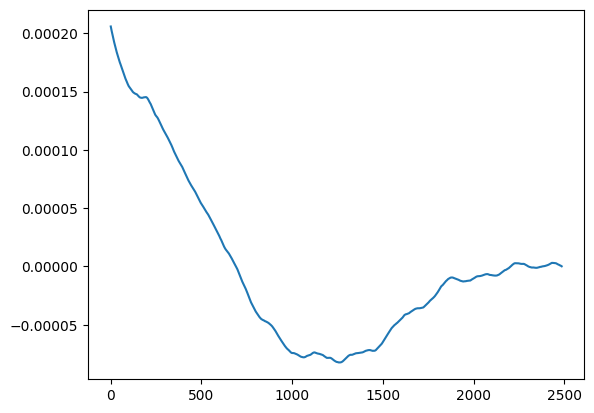

In [29]:
# Plotting Autocovariance
autocovariance_audusd = smt.stattools.acovf(dfaudusd_hr['bid_open'], fft=True)
plt.plot(list(range(0,len(autocovariance_audusd))),autocovariance_audusd)

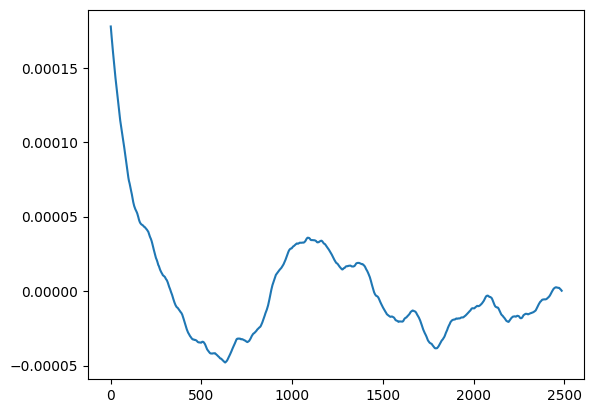

In [30]:
autocovariance_euraud = smt.stattools.acovf(dfeuraud_hr['bid_open'], fft=True)
plt.plot(list(range(0,len(autocovariance_euraud))),autocovariance_euraud)

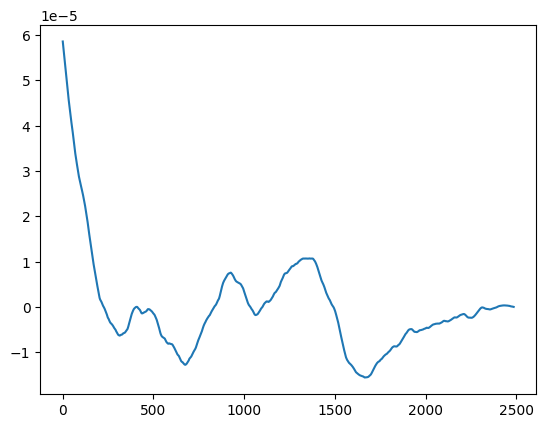

In [31]:
autocovariance_eurgbp = smt.stattools.acovf(dfeurgbp_hr['bid_open'], fft=True)
plt.plot(list(range(0,len(autocovariance_eurgbp))),autocovariance_eurgbp)

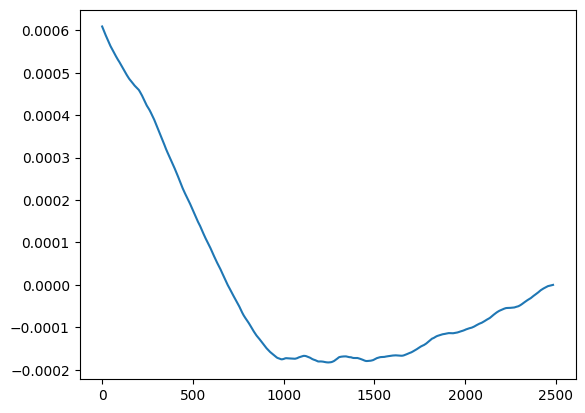

In [32]:
autocovariance_eurusd = smt.stattools.acovf(dfeurusd_hr['bid_open'], fft=True)
plt.plot(list(range(0,len(autocovariance_eurusd))),autocovariance_eurusd)

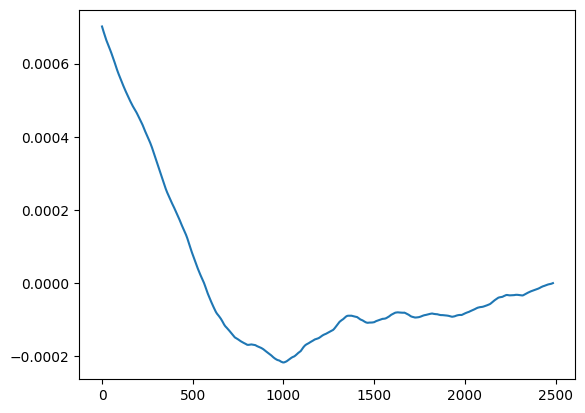

In [33]:
autocovariance_gbpusd = smt.stattools.acovf(dfgbpusd_hr['bid_open'], fft=True)
plt.plot(list(range(0,len(autocovariance_gbpusd))),autocovariance_gbpusd)

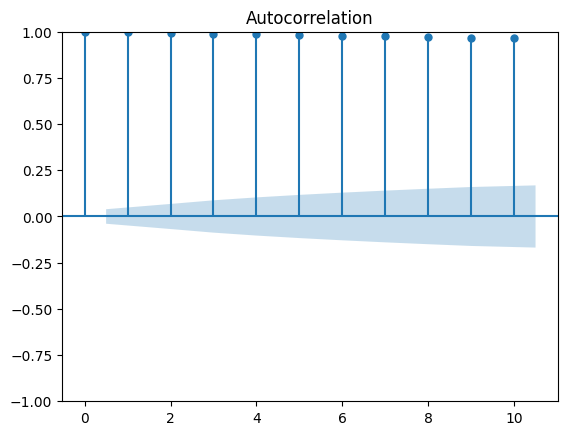

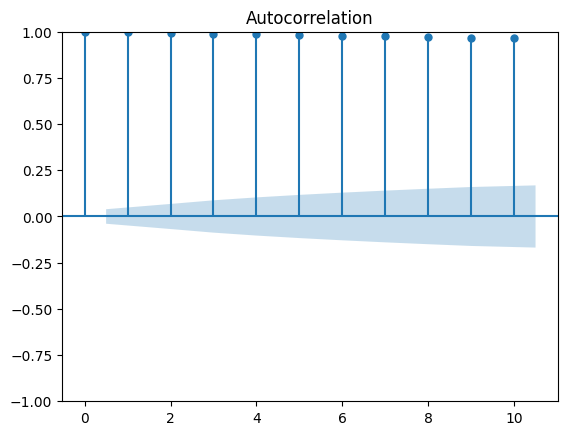

In [36]:
smt.graphics.plot_acf(dfaudusd_hr['bid_open'],lags=10,alpha=0.05)

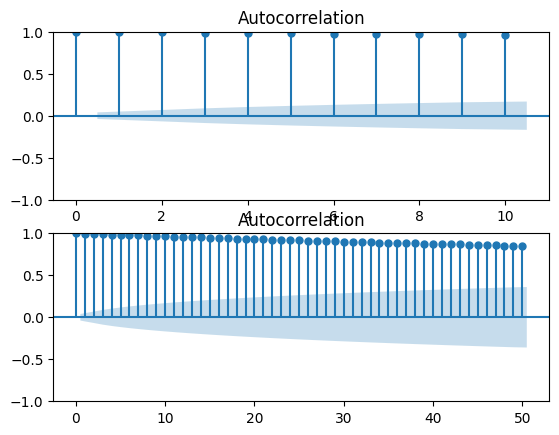

In [99]:
fig, (ax, ax2) = plt.subplots(nrows=2) # create two subplots, one in each row

smt.graphics.plot_acf(dfaudusd_hr['bid_open'],lags=10,alpha=0.05, ax=ax)
smt.graphics.plot_acf(dfaudusd_hr['bid_open'],lags=50,alpha=0.05, ax=ax2)

plt.show()


lags = [10,50,100,200,500,1500,3000]




In [148]:
def autocorrelation_plots(curr_df, name):
    fig, ((ax, ax2), (ax3, ax4)) = plt.subplots(2,2) # create two subplots, one in each row
    smt.graphics.plot_acf(curr_df['bid_open'],lags=10,alpha=0.05, title="Autocorrelation with lags 10", ax=ax)
    smt.graphics.plot_acf(curr_df['bid_open'],lags=50,alpha=0.05, title="Autocorrelation with lags 50",ax=ax2)
    smt.graphics.plot_acf(curr_df['bid_open'],lags=100,alpha=0.05, title="Autocorrelation with lags 100",ax=ax3)
    smt.graphics.plot_acf(curr_df['bid_open'],lags=200,alpha=0.05, title="Autocorrelation with lags 200",ax=ax4)
    fig.suptitle('Autocorrelation ' + str(name))
    fig.tight_layout()
    plt.show()

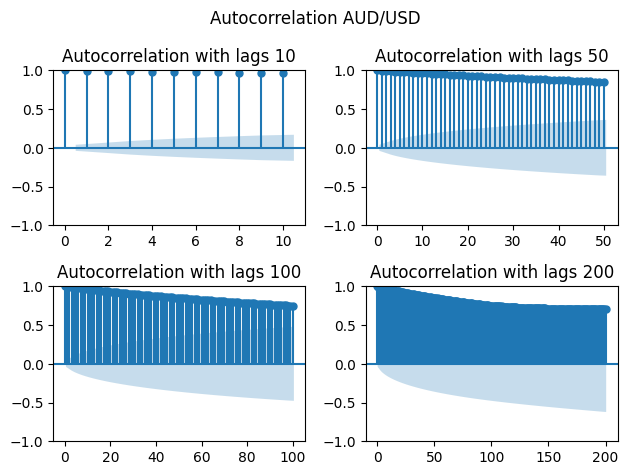

In [150]:
autocorrelation_plots(dfaudusd_hr, 'AUD/USD')

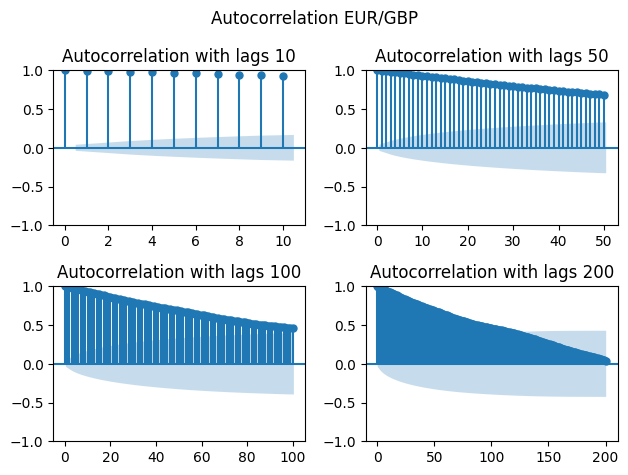

In [151]:
autocorrelation_plots(dfeurgbp_hr, 'EUR/GBP')

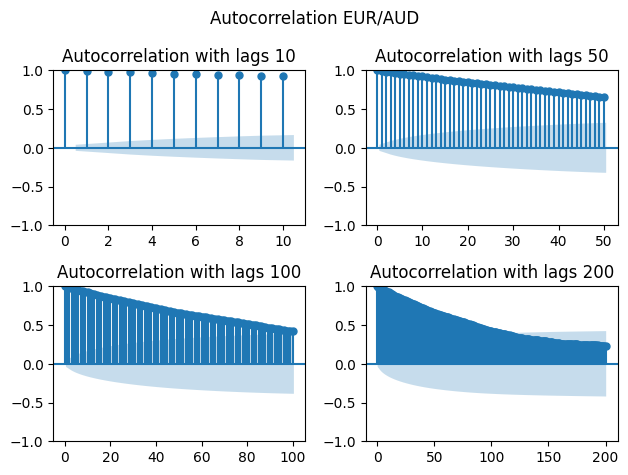

In [154]:
autocorrelation_plots(dfeuraud_hr, 'EUR/AUD')

In [ ]:
# x = dfeurusd_day['date']
# y = dfeurusd_day['bid_open']
# plt.plot(x,y)
# plt.show()

In [ ]:
# df_openw = dfeurusd_day[['date', 'bid_open']]
# df_openw['date'] = pd.to_datetime(df_openw['date'])
# df_openw = df_open.set_index(pd.DatetimeIndex(df_openw['date']))
# del df_openw['date']
# df_openw.head()
# autocorrelation_plot(df_openw)

### Augmented Dickey Fuller test

In [92]:
def adfuller_test(data, field):
    print(f'Hypothesis test on field :{field}')
    print(f'H0: {field} is not stationary, H1: {field} is stationary')
    ADF_stat, p_val, lags, obs, crit, t = adfuller(data[field])
    print(f'ADF Statistic: {ADF_stat}')
    print(f'p-value: {p_val}')
    print(f'lags: {lags}')
    print(f'obs: {obs}')
    print(f'Critical Values: {crit}')
    print(f't: {t}')
    if p_val > 0.05:
        print('Conclusion: Do not reject H0, probably not stationary')
    else:
        print('Conclusion: Reject H0, Is stationary')
    # for key, value in result[4].items():
    #     print('\t{}: {}'.format(key, value))

In [93]:
adfuller_test(dfaudusd_hr, 'bid_close')

Hypothesis test on field :bid_close
H0: bid_close is not stationary, H1: bid_close is stationary
ADF Statistic: -2.8573980568904536
p-value: 0.05053104713100041
lags: 1
obs: 2484
Critical Values: {'1%': -3.432985294091178, '5%': -2.862704255635287, '10%': -2.567389778920032}
t: -27079.556540167752
Conclusion: Do not reject H0, probably not stationary


## ARIMA model 

Steps for the ARIMA Model:
1) Correct Data Sets
2) Stationarity
3) ACF and PACF
4) Forecasting

Gonna assume the data is fine from previously, so take 1) as done

#### Stationarity

AUD/USD already went through the ADF test and was proven as stationary, let us put the rest of the data through.

In [94]:
adfuller_test(dfeuraud_hr,'bid_close')

Hypothesis test on field :bid_close
H0: bid_close is not stationary, H1: bid_close is stationary
ADF Statistic: -2.922679327060934
p-value: 0.04277355024636722
lags: 3
obs: 2482
Critical Values: {'1%': -3.4329874198181174, '5%': -2.86270519435214, '10%': -2.56739027870612}
t: -24614.450540478185
Conclusion: Reject H0, Is stationary


In [95]:
adfuller_test(dfeurgbp_hr, 'bid_close')

Hypothesis test on field :bid_close
H0: bid_close is not stationary, H1: bid_close is stationary
ADF Statistic: -2.919122712434902
p-value: 0.04316904869278075
lags: 1
obs: 2484
Critical Values: {'1%': -3.432985294091178, '5%': -2.862704255635287, '10%': -2.567389778920032}
t: -27771.237255219763
Conclusion: Reject H0, Is stationary


In [98]:
adfuller_test(dfeurusd_hr,'bid_close')

Hypothesis test on field :bid_close
H0: bid_close is not stationary, H1: bid_close is stationary
ADF Statistic: -2.042931854929713
p-value: 0.26807182468197
lags: 0
obs: 2485
Critical Values: {'1%': -3.4329842325121738, '5%': -2.862703786843828, '10%': -2.567389529328891}
t: -26617.03196613028
Conclusion: Do not reject H0, probably not stationary


In [96]:
adfuller_test(dfgbpusd_hr,'bid_close')

Hypothesis test on field :bid_close
H0: bid_close is not stationary, H1: bid_close is stationary
ADF Statistic: -2.060419007507181
p-value: 0.26072512988547564
lags: 0
obs: 2485
Critical Values: {'1%': -3.4329842325121738, '5%': -2.862703786843828, '10%': -2.567389529328891}
t: -24835.30088898441
Conclusion: Do not reject H0, probably not stationary


So from the stationarity check, we have aud/usd, eur/aud as stationary datasets, and eur/gbp, gbp/usd as non stationary datasets. We need to work with the non-stationary datasets to convert them to stationary.

In [ ]:
dfeurgbpse.head()

,date,bid_open,bid_high,bid_low,bid_close,bid_volume,bid_average,bid_barCount,ask_open,ask_high,ask_low,ask_close,ask_volume,ask_average,ask_barCount,Date,Time,Useless
36000,2020-06-01 10:00:00+00:00,0.89700,0.89710,0.89700,0.89710,-1,-1.0,-1,0.89704,0.89712,0.89704,0.89712,-1,-1.0,-1,2020-06-01,10:00:00,00:00
57600,2020-06-01 16:00:00+00:00,0.89195,0.89197,0.89195,0.89197,-1,-1.0,-1,0.89200,0.89200,0.89198,0.89199,-1,-1.0,-1,2020-06-01,16:00:00,00:00
36000,2020-06-02 10:00:00+00:00,0.88968,0.88972,0.88968,0.88971,-1,-1.0,-1,0.88973,0.88977,0.88973,0.88976,-1,-1.0,-1,2020-06-02,10:00:00,00:00
57600,2020-06-02 16:00:00+00:00,0.89118,0.89122,0.89116,0.89121,-1,-1.0,-1,0.89119,0.89126,0.89119,0.89123,-1,-1.0,-1,2020-06-02,16:00:00,00:00
36000,2020-06-03 10:00:00+00:00,0.89051,0.89053,0.89049,0.89049,-1,-1.0,-1,0.89056,0.89056,0.89051,0.89052,-1,-1.0,-1,2020-06-03,10:00:00,00:00


In [ ]:
dfeurgbpse['bid_open'].head()

36000    0.89700
57600    0.89195
36000    0.88968
57600    0.89118
36000    0.89051
Name: bid_open, dtype: float64

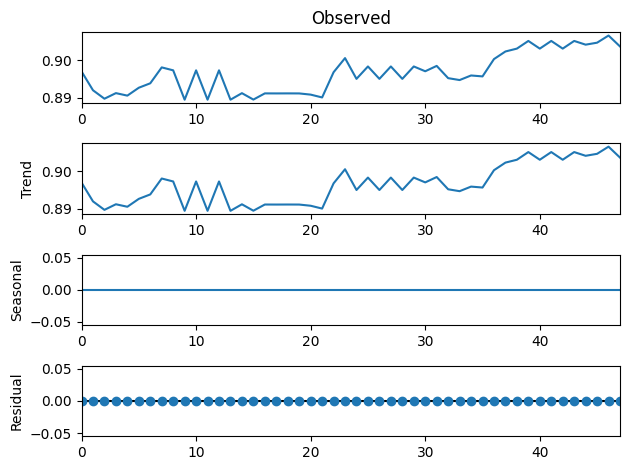

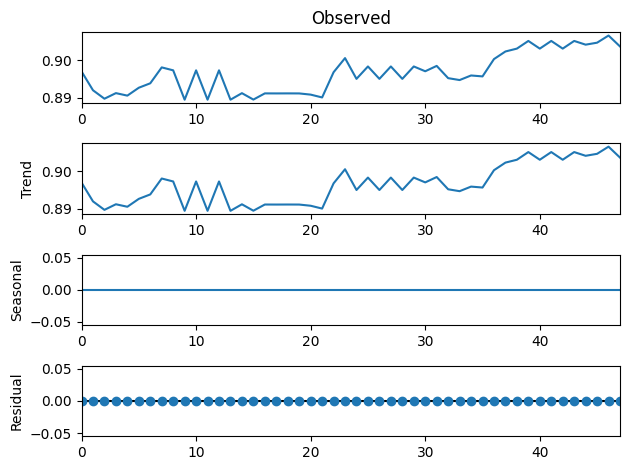

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

eurgbpse_list = dfeurgbpse['bid_open'].tolist()
observations = seasonal_decompose(eurgbpse_list, model = 'additive', period = 1)
observations.plot()



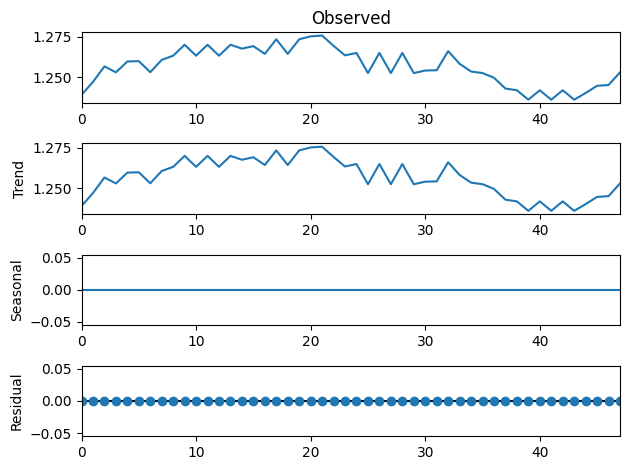

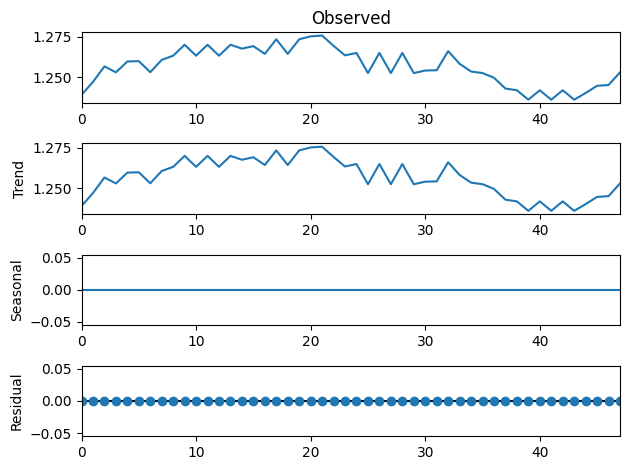

In [ ]:
gbpusdse_list = dfgbpusdse['bid_open'].tolist()
observations = seasonal_decompose(gbpusdse_list, model = 'additive', period = 1)
observations.plot()

Graphically, we can see that the two time series have some form of trend. We are going to take the difference between the data points once, and then see if the series become stationary. Can insert equations here later.

In [ ]:
#differencing with the shift function

#eur

In [ ]:
from statmodels.tsa.arima_model import ARIMA
arima_model = ARIMA(dfaudusd_hr, order=(1,1,2))
model = arima_model.fit()
print(model.summary())


In [ ]:
df_open = dft[['date', 'bid_open']]
df_open['date'] = pd.to_datetime(df_open['date'])
df_open = df_open.set_index(pd.DatetimeIndex(df_open['date']))
del df_open['date']
df_open.head()

In [ ]:
dfaudusd_bid['Open-Close'] = dfaudusd_bid['bid_open'] - dfaudusd_bid['bid_close'].shift(1)
dfaudusd_bid['Open-Open'] = dfaudusd_bid['bid_open'] - dfaudusd_bid['bid_open'].shift(1)

In [ ]:
rolling_mean = df_open.rolling(window=3).mean()
rolling_std = df_open.rolling(window = 3).std()

plt.plot(df_open, color='blue', label='Original')
plt.plot(rolling_mean, color = 'red', label='Rolling Mean')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()


In [ ]:
df_log = np.log(df_open)
rolling_mean = df_log.rolling(window = 5).mean()
rolling_std = df_log.rolling(window = 5).std()

plt.plot(df_log, color='blue', label='Original')
plt.plot(rolling_mean, color = 'red', label='Rolling Mean')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

In [ ]:
decomposition = seasonal_decompose(df_open) 
model = ARIMA(df_open, order=(1,1,1))
results = model.fit()#disp=-1
df_shift = df_open - df_open.shift()
plt.plot(df_shift)
plt.plot(results.fittedvalues, color='red')

## Supervised learning model

In [210]:
def predictModel(data, ML):
    df_bid = data[['datetime', 'bid_open', 'bid_close', 'bid_volume']]
    df_bid = df_bid.set_index(['datetime'])
    X= df_bid
    y = np.where(df_bid['bid_close'].shift(-1) > df_bid['bid_close'], 1,-1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
    if ML == 'lg':
        model = LogisticRegression().fit(X_train, y_train)
    elif ML == 'rf':
            model = RandomForestRegressor(n_estimators=1000)
            model.fit(X_train, y_train)
    else:
        print("Error: please type 'logistic or randomforest for the model parameter")
    return model, X_train, X_test, y_train, y_test

    
    

In [296]:
df_bid = dfeuraud_hr[['datetime','bid_open', 'bid_close', 'bid_low', 'bid_high', 'bid_volume']]
df_bid = df_bid.set_index(['datetime'])
X= df_bid
y = np.where(df_bid['bid_close'].shift(-1) > df_bid['bid_close'], 1,-1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
# scale = StandardScaler()
# x_train = scale.fit_transform(X_train)
# x_test = scale.transform(X_test)
# model = RandomForestRegressor(n_estimators=100).fit(X_train, y_train)
# model.score(X_test, y_test)

(1988, 5)

In [304]:
model = RandomForestRegressor(n_estimators=1000, criterion="squared_error", min_samples_leaf=3, min_samples_split=3, max_depth=10).fit(X_train, y_train)
# model.score(X_test, y_test)
predict = model.predict(X_test)

### Logisitc Regression

In [248]:
# display both logistic and random forest models for FX pairings
eurgbp_lmodel, eurgbpX_ltrain, eurgbpX_ltest, eurgbpy_ltrain, eurgbpy_ltest = predictModel(dfeurgbp_hr, 'lg')
euraud_lmodel, euraudX_ltrain, euraudX_ltest, euraudy_ltrain, euraudy_ltest = predictModel(dfeuraud_hr, 'lg')

In [250]:
#coefficent
print(f'Coefficient for eurogbp : \n{eurgbp_lmodel.coef_}')
print()
print(f'Coefficent for euroaud : \n{euraud_lmodel.coef_}')

Coefficient for eurogbp : 
[[-3.15694505e-01 -3.16270565e-01  3.32727533e-07]]

Coefficent for euroaud : 
 [[-5.93294626e-01 -5.94438028e-01 -2.57962273e-05]]


In [268]:
#probability values
eurgbpl_prob = eurgbp_lmodel.predict_proba(eurgbpX_ltest)
euraudl_prob = euraud_lmodel.predict_proba(euraudX_ltest)
print(f'Probability values for eurgbp: \n{eurgbpl_prob[:5]}')


Probability values for eurgbp: 
 [[0.49052208 0.50947792]
 [0.49056787 0.50943213]
 [0.49059315 0.50940685]
 [0.4905434  0.5094566 ]
 [0.49052287 0.50947713]]


In [270]:
#prediction values
eurgbpl_predictvals = eurgbp_lmodel.predict(eurgbpX_ltest)
euraudl_predictvals = euraud_lmodel.predict(euraudX_ltest)
print(f'Probability values for eurgbp: \n {eurgbpl_predictvals[:20]}')

Probability values for eurgbp: 
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


Feature: 0, Score: -0.31569
Feature: 1, Score: -0.31627
Feature: 2, Score: 0.00000


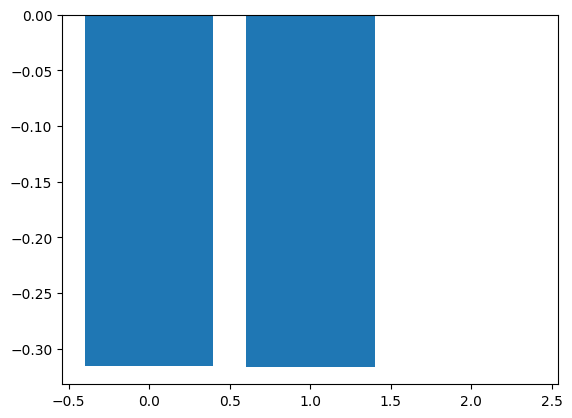

In [271]:
#Testing importance
importance = eurgbp_lmodel.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Feature: 0, Score: -0.59329
Feature: 1, Score: -0.59444
Feature: 2, Score: -0.00003


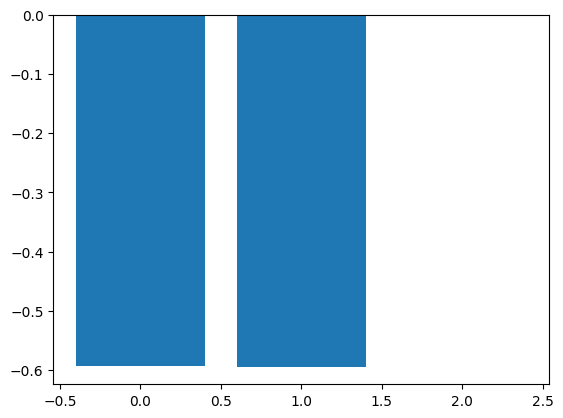

In [272]:
#Testing importance
importance = euraud_lmodel.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

### Random Forest

In [213]:
eurgbp_rmodel, eurgbpX_rtrain, eurgbpX_rtest, eurgbpy_rtrain, eurgbpy_rtest = predictModel(dfeurgbp_hr, 'rf')
euraud_rmodel, euraudX_rtrain, euraudX_rtest, euraudy_rtrain, euraudy_rtest = predictModel(dfeuraud_hr, 'rf')

In [ ]:
#coefficent
print(f'Coefficient for eurogbp : \n{eurgbp_lmodel.coef_}')
print()
print(f'Coefficent for euroaud : \n{euraud_lmodel.coef_}')

In [ ]:
#probability values
eurgbpr_prob = eurgbp_rmodel.predict_proba(eurgbpX_rtest)
euraudr_prob = euraud_rmodel.predict_proba(euraudX_rtest)
print(f'Probability values for eurgbp: \n{eurgbpr_prob[:5]}')

In [ ]:
#prediction values
eurgbpr_predictvals = eurgbp_rmodel.predict(eurgbpX_rtest)
euraudr_predictvals = euraud_rmodel.predict(euraudX_rtest)
print(f'Probability values for eurgbp: \n {eurgbpr_predictvals[:20]}')

In [ ]:
#Testing importance
importance = eurgbp_lmodel.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

## Model Evaluation -- phase 

### Logistic model evaluation

In [135]:
print(metrics.confusion_matrix(eurgbpX_ltest, eurgbpl_predictvals))
tn, fp, fn, tp = metrics.confusion_matrix(eurgbpX_ltest, eurgbpl_predictvals).ravel()
print(f'tn:{tn}, fp:{fp}, fn:{fn}, tp:{tp}')

[[  0 253]
 [  0 243]]
tn:0, fp:253, fn:0, tp:243


In [ ]:
metrics.classification_report(eurgbpy_ltest, eurgbpl_predictvals)

'              precision    recall  f1-score   support\n\n          -1       0.38      0.07      0.11       221\n           1       0.49      0.89      0.63       222\n\n    accuracy                           0.48       443\n   macro avg       0.43      0.48      0.37       443\nweighted avg       0.43      0.48      0.37       443\n'

In [ ]:
print(metrics.confusion_matrix(euraudy_ltest, euraudl_predictvals))
tn, fp, fn, tp = metrics.confusion_matrix(euraudX_ltest, euraudl_predictvals).ravel()
print(f'tn:{tn}, fp:{fp}, fn:{fn}, tp:{tp}')

In [ ]:
metrics.classification_report(euraudX_ltest, euraudl_predictvals)

In [ ]:
def RF_evaluation_scores(model, predict, X_train, y_train, X_test, y_test):
    print("(R^2) Score:", round(metrics.r2_score(y_test, predict), 4))
    print(f'Train Score : {model.score(X_train, y_train) * 100:.2f}% and Test Score : {model.score(X_test, y_test) * 100:.2f}% using Logistic Regression.')
    print('Accuracy:', round(accuracy_score(y_test, predict),2), '.') 

In [ ]:
###Comparing both model score results

### Random Forest evaluation

In [ ]:
def RF_evaluation_scores(model, predict, X_train, y_train, X_test, y_test):
    print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, predict), 4))
    print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, predict), 4))
    print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, predict)), 4))
    print("(R^2) Score:", round(metrics.r2_score(y_test, predict), 4))
    print(f'Train Score : {model.score(X_train, y_train) * 100:.2f}% and Test Score : {model.score(X_test, y_test) * 100:.2f}% using Random Tree Regressor.')
    errors = abs(predict - y_test)
    mape = 100 * (errors / y_test)
    accuracy = 100 - np.mean(mape)
    print('Accuracy:', round(accuracy, 2), '%.') 

In [ ]:
print('Model scores')
print(f'{eurgbp_lmodel.score(eurgbpX_ltest, eurgbpy_ltest)}')
print(f'{euraud_lmodel.score(euraudX_ltest, euraudy_ltest)}')
#add the randomforest classifiers

## Trading strategy

In [ ]:
split = int(0.7*len(dfaudusd_bid))
dfaudusd_bid['predict_signals'] = model.predict()
dfaudusd_bid['Nifty_returns']  = np.log(dfaudusd_bid['Close']/dfaudusd_bid['Close'].shift(1))
Cumulative_Nifty_returns = np.cumsum(dfaudusd_bid[split:]['Strategy_returns'])

dfaudusd_bid['Startegy_returns'] = dfaudusd_bid['Nifty_returns']* dfaudusd_bid['Predicted_Signal'].shift(1)
Cumulative_Strategy_returns = np.cumsum(dfaudusd_bid[split:]['Startegy_returns'])

plt.figure(figsize=(10,5))
plt.plot(Cumulative_Nifty_returns, color='r',label = 'Nifty Returns')
plt.plot(Cumulative_Strategy_returns, color='g', label = 'Strategy Returns')
plt.legend()
plt.show()

TypeError: LinearClassifierMixin.predict() missing 1 required positional argument: 'X'